In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import collections

In [2]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("reuters")
nltk.download("brown")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### データを取得

In [3]:
from nltk.corpus import brown as corpus

### datasetの中身を確認

In [4]:
for n,item in enumerate(corpus.words(corpus.fileids()[0])[:300]):
    print(item, end=" ")
    if (n%25) ==24:
      print(" ")

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .  
The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise  
and thanks of the City of Atlanta '' for the manner in which the election was conducted . The September-October term jury had been charged  
by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan  
Allen Jr. . `` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in  
the election , the number of voters and the size of this city '' . The jury said it did find that many of Georgia's  
registration and election laws `` are outmoded or inadequate and often ambiguous '' . It recommended that Fulton legislators act `

In [5]:
docs=[corpus.words(fileid) for fileid in corpus.fileids()]
print(docs[:5])
print("num of docs:", len(docs))

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...], ['Austin', ',', 'Texas', '--', 'Committee', 'approval', ...], ['Several', 'defendants', 'in', 'the', 'Summerdale', ...], ['Oslo', 'The', 'most', 'positive', 'element', 'to', ...], ['East', 'Providence', 'should', 'organize', 'its', ...]]
num of docs: 500


## 前処理編

### 例 : ストップワードリストの作成

### nltkのストップワードリスト

In [6]:
en_stop = nltk.corpus.stopwords.words('english')

### 例:【発展】記号や数字は正規表現で消してみる

In [7]:
en_stop= ["``","/",",.",".,",";","--",":",")","(",'"','&',"'",'),',',"','-','.,','.,"','.-',"?",">","<", 
          "0","1","2","3","4","5","6","7","8","9","10","11","12","86","1986","1987","000", 
          "said","say","u","v","mln","ct","net","dlrs","tonne","pct","shr","nil","company","lt","share","year","billion","price"] \
         +en_stop

### 前処理関数の作成

In [8]:
from nltk.corpus import wordnet as wn #lemmatize関数のためのimport

def preprocess_word(word, stopwordset):
    
    #1.make words lower ex: Python =>python
    word=word.lower()
    
    #2.remove "," and "."
    if word in [",","."]:
        return None
    
    #3.remove stopword  ex: the => (None) 
    if word in stopwordset:
        return None
    
    #4.lemmatize  ex: cooked=>cook
    lemma = wn.morphy(word)
    if lemma is None:
        return word

    elif lemma in stopwordset: #lemmatizeしたものがstopwordである可能性がある
        return None
    else:
        return lemma
    

def preprocess_document(document):
    document=[preprocess_word(w, en_stop) for w in document]
    document=[w for w in document if w is not None]
    return document

def preprocess_documents(documents):
    return [preprocess_document(document) for document in documents]

## クラスタリング編

### tf idfで上記の前処理済みの文章をベクトル化
### vectorizerを使用する（ハイパーパラメーターの設定）

In [9]:
pre_docs=preprocess_documents(docs)
pre_docs=[" ".join(doc) for doc in pre_docs]
print(pre_docs[0])

vectorizer = TfidfVectorizer(max_features=200, token_pattern=u'(?u)\\b\\w+\\b' )

fulton county grand jury friday investigation atlanta's recent primary election produce evidence '' irregularity take place jury term-end presentment city executive committee over-all charge election deserve praise thanks city atlanta '' manner election conduct september-october term jury charge fulton superior court judge durwood pye investigate report possible irregularity '' hard-fought primary mayor-nominate ivan allen jr. relative handful report receive '' jury consider widespread interest election number voter size city '' jury find many georgia's registration election laws outmode inadequate often ambiguous '' recommend fulton legislator act laws study revise end modernize improve '' grand jury comment number topic among atlanta fulton county purchasing department well operate follow generally accept practice inure best interest government '' merger propose however jury belief two office combine achieve greater efficiency reduce cost administration '' city purchasing department 

### fitする

In [10]:
tf_idf = vectorizer.fit_transform(pre_docs)

### K-means

In [11]:
def test_k_means(num_clusters):
  km = KMeans(n_clusters=num_clusters, random_state = 0)
  clusters = km.fit_predict(tf_idf)
  print(f"{num_clusters}: {km.inertia_}")
  return km.inertia_


### 出力結果

In [12]:
inertia_list = []
for i in range(1, 51):
  inertia_list.append(test_k_means(i))


1: 346.2016432553016
2: 323.22702912857267
3: 306.5504042858648
4: 297.3940955997451
5: 290.7131893316773
6: 284.77898627171743
7: 279.45158194516534
8: 274.77409191450755
9: 271.79023406325615
10: 267.98886901792144
11: 264.8705290425191
12: 262.1350235205587
13: 259.20089298162475
14: 256.3670918753162
15: 255.81699202420876
16: 251.50284232159515
17: 249.43641128073622
18: 247.16342996603123
19: 244.9559391048862
20: 244.0645680871464
21: 242.5925061159357
22: 241.12264462969296
23: 240.06505119252375
24: 238.76465364533726
25: 237.1085692981077
26: 235.22997156783183
27: 233.80928253778237
28: 233.08845414456965
29: 231.57073022569136
30: 230.3336627724481
31: 229.54331989185795
32: 227.6781184859863
33: 226.36336042489202
34: 224.9130022724461
35: 223.26566645720015
36: 221.7111855946019
37: 220.7371501725546
38: 220.2269505383164
39: 219.70487936561304
40: 219.0124838771659
41: 217.8621129844545
42: 215.98832779187353
43: 214.9249597285665
44: 214.2398516429091
45: 213.3940120984

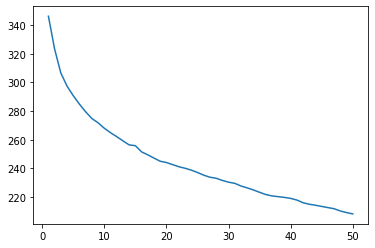

In [13]:
import matplotlib.pyplot as plt

plt.plot(range(1,51), inertia_list)
plt.show()
